In [1]:
# Run this cell to set up packages for lecture.
from lec09_imports import *

# Lecture 9 – Grouping on Multiple Columns, Merging

## DSC 10, Winter 2024

### Announcements
    
- Quiz 2 is **tonight in discussion section**.
   - The quiz covers Lectures 5 through 7, which includes querying, grouping, and data visualization.
   - To study:
       - Review your mistakes on Quiz 1.
       - Work through the [problem set](https://practice.dsc10.com/probset03/index.html) from Friday's extra practice session.
       - Review the lecture slides and readings.
       - Work ahead: Lab 2 is great practice for the quiz!
- Lab 2 is due **tomorrow at 11:59PM**.
- Homework 2 is due on **Thursday at 11:59PM**.
- The Midterm Project is coming out soon. Try to find a partner!
    - You can work with a partner from any lecture section, but if you do, you must follow these [project partner guidelines](https://dsc10.com/project-partners/). 

### Agenda

- Grouping on multiple columns.
- Merging.

## Grouping on multiple columns

### DSC 10 student data

In [18]:
roster = bpd.read_csv('data/roster-anon.csv')
roster

,name,section
0,Jolette Obtwuz,9AM
1,Ian Lmuqpm,11AM
2,Nicole Wpedyy,10AM
...,...,...
250,Genevieve Cibjer,9AM
251,Devon Gncdxq,11AM
252,Allyson Hknnwt,9AM


Recall, last class, we extracted the first name of each student in the class.

In [19]:
def first_name(full_name):
    '''Returns the first name given a full name.'''
    return full_name.split(' ')[0]

In [20]:
roster = roster.assign(
    first=roster.get('name').apply(first_name)
)
roster

,name,section,first
0,Jolette Obtwuz,9AM,Jolette
1,Ian Lmuqpm,11AM,Ian
2,Nicole Wpedyy,10AM,Nicole
...,...,...,...
250,Genevieve Cibjer,9AM,Genevieve
251,Devon Gncdxq,11AM,Devon
252,Allyson Hknnwt,9AM,Allyson


### How many students named Ryan are in each section?

We discovered that Ryan is the most popular first name overall.

In [21]:
name_counts = (
    roster
    .groupby('first')
    .count()
    .sort_values('name', ascending=False)
    .get(['name'])
)
name_counts

,name
first,
Ryan,4
Matthew,3
Alice,2
...,...
Hrithik,1
Huiyu,1
Ziling,1


To find the number of `'Ryan'`s in each lecture section, we can query for only the rows corresponding to `'Ryan'`s, and then group by `'section'`.

In [22]:
roster[roster.get('first') == 'Ryan'].groupby('section').count()

,name,first
section,,
10AM,2,2
11AM,1,1
9AM,1,1


But what if we want to know the number of `'Matthew'`s and `'Alice'`s per section, too?

In [23]:
roster[roster.get('first') == 'Matthew'].groupby('section').count()

,name,first
section,,
11AM,2,2
9AM,1,1


In [24]:
roster[roster.get('first') == 'Alice'].groupby('section').count()

,name,first
section,,
10AM,1,1
11AM,1,1


Is there a way to do this **for all first names and sections** all at once?

### How many students with each first name does each lecture section have?

- Right now, we can count the number of students with each first name, by grouping `roster` by `'first'`.

In [25]:
# One row per unique first name.
roster.groupby('first').count().get('name')

first
Aadya     1
Aanya     1
Aaron     1
         ..
Zifan     1
Zilin     1
Ziling    1
Name: name, Length: 232, dtype: int64

- We can also count the number of students in each lecture section, by grouping `roster` by `'section'`.

In [26]:
# One row per unique section.
roster.groupby('section').count().get('name')

section
10AM    106
11AM     79
9AM      68
Name: name, dtype: int64

- However, neither of the above Series give us the number of students **with each first name** **in each section**.
    - For instance, neither result tells me the number of `'Ryan'`s in the 9AM section or the number of `'Alice'`s in the 10AM section.

- It would be nice if we could group by both `'first'` **and** `'section'` – and we can!

### Grouping on multiple columns

In [27]:
roster

,name,section,first
0,Jolette Obtwuz,9AM,Jolette
1,Ian Lmuqpm,11AM,Ian
2,Nicole Wpedyy,10AM,Nicole
...,...,...,...
250,Genevieve Cibjer,9AM,Genevieve
251,Devon Gncdxq,11AM,Devon
252,Allyson Hknnwt,9AM,Allyson


We can pass a **list** of column names to `.groupby`!

In [28]:
roster.groupby(['section', 'first']).count()

name
section first          
10AM    Aadya         1
        Aanya         1
        Alice         1
...                 ...
9AM     Zhencheng     1
        Zilin         1
        Ziling        1

[245 rows x 1 columns]

The above DataFrame is telling us, for instance, that there is 1 student with the first name `'Aadya'` in the 10AM section.

It is **not** saying that there is only one `'Aadya'` in the course overall. There could be more in the other sections.

### Grouping on multiple columns

- To group on multiple columns, pass a **list** of column names to `.groupby`:

<br>

<center><code>df.groupby(['col_1', 'col_2', ..., 'col_k'])</code></center>


- Group by `'col_1'` first. **Within each group**, group by `'col_2'`, and so on.

- **Important: The resulting DataFrame has one row per unique combination of entries in the specified columns.**
    - On the previous slide, we had exactly one row for every combination of `'section'` and `'first'`.

- Formally, when we group on multiple columns, we are creating _subgroups_ – that is, **groups within groups**.
    - On the previous slide, we first grouped by `'section'`, and within each section, we grouped by `'first'`.

### Notice the index... 🤔

- This is called a "[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)".
    - The DataFrame is indexed by `'section'` **and** `'first'`.
- We won't worry about the details of MultiIndexes.
- We can use `.reset_index()` to "flatten" our DataFrame back to normal.

In [29]:
roster.groupby(['section', 'first']).count().reset_index()

,section,first,name
0,10AM,Aadya,1
1,10AM,Aanya,1
2,10AM,Alice,1
...,...,...,...
242,9AM,Zhencheng,1
243,9AM,Zilin,1
244,9AM,Ziling,1


### Does order matter?

In [30]:
roster.groupby(['section', 'first']).count().reset_index()

,section,first,name
0,10AM,Aadya,1
1,10AM,Aanya,1
2,10AM,Alice,1
...,...,...,...
242,9AM,Zhencheng,1
243,9AM,Zilin,1
244,9AM,Ziling,1


In [31]:
roster.groupby(['first', 'section']).count().reset_index()

,first,section,name
0,Aadya,10AM,1
1,Aanya,10AM,1
2,Aaron,11AM,1
...,...,...,...
242,Zifan,10AM,1
243,Zilin,9AM,1
244,Ziling,9AM,1


**Answer**: Kind of. The order of the rows and columns will be different, but the content will be the same.

### Activity

Using `counts`, find the lecture section with the most `'Ryan'`s.

<details>
<summary>✅ Click <b>here</b> to see the solution <b>after</b> you've tried it yourself.</summary>
    
<pre>

ryan_counts = counts[counts.get('first') == 'Ryan']
ryan_counts.sort_values('name', ascending=False).get('section').iloc[0]

</pre>
    
</details>

In [32]:
counts = roster.groupby(['section', 'first']).count().reset_index()
counts

,section,first,name
0,10AM,Aadya,1
1,10AM,Aanya,1
2,10AM,Alice,1
...,...,...,...
242,9AM,Zhencheng,1
243,9AM,Zilin,1
244,9AM,Ziling,1


In [ ]:
...

### Activity

Using `counts`, find the longest first name in the class that is shared by at least two students in the same section.

<details>
<summary>✅ Click <b>here</b> to see the solution <b>after</b> you've tried it yourself.</summary>
    
<pre>

with_len = counts.assign(length=counts.get('first').apply(len))
with_len[with_len.get('name') >= 2].sort_values('length', ascending=False).get('first').iloc[0]

</pre>
    
</details>

In [ ]:
...

### Example: Sea temperatures 🌊

[This dataset](https://library.ucsd.edu/dc/object/bb4003017c) contains the sea surface temperature in La Jolla, on many days ranging from August 22, 1916 to June 30, 2023.

In [37]:
sea_temp = bpd.read_csv('data/sea_temp.csv')
sea_temp

,YEAR,MONTH,DAY,SURFACE_TEMP
0,1916,8,22,19.5
1,1916,8,23,19.9
2,1916,8,24,19.7
...,...,...,...,...
37738,2023,6,28,19.7
37739,2023,6,29,19.3
37740,2023,6,30,20.6


### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

We want to find the single month (e.g. November 1998) with the highest average `'SURFACE_TEMP'`.

Which of the following would help us achieve this goal?

A. `sea_temp.groupby('SURFACE_TEMP').mean()`

B. `sea_temp.groupby('MONTH').mean()`

C. `sea_temp.groupby(['YEAR', 'MONTH']).mean()`

D. `sea_temp.groupby(['MONTH', 'DAY']).mean()`

E. `sea_temp.groupby(['MONTH', 'SURFACE_TEMP']).mean()`

In [ ]:
...

### Plots of monthly and yearly average surface temperature 📈

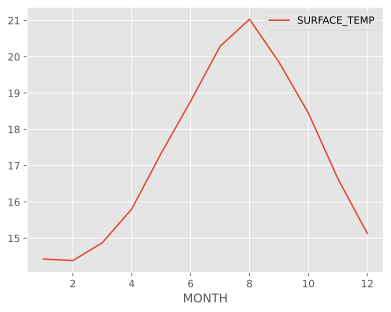

In [38]:
(sea_temp
 .groupby('MONTH') 
 .mean() 
 .plot(kind='line', y='SURFACE_TEMP')
);

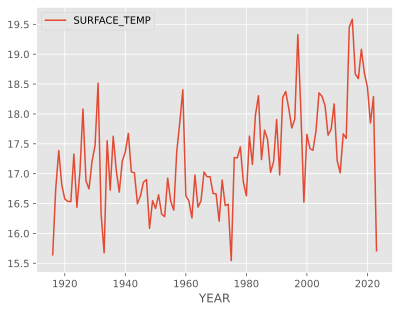

In [39]:
# Why is there a sudden drop at the end? Look at the dates of data collection!
(sea_temp
 .groupby('YEAR') 
 .mean() 
 .plot(kind='line', y='SURFACE_TEMP')
);

### Summary: Grouping on multiple columns

- Pass a list of columns to `.groupby` to group on multiple columns. This creates groups within groups.
- Use `.reset_index()` after grouping on multiple columns to move the MultiIndex back to the columns.

## Merging 🚙

In [40]:
phones = bpd.DataFrame().assign(
    Model=['iPhone 13', 'iPhone 13 Pro Max', 'Samsung Galaxy Z Flip', 'Pixel 5a'],
    Price=[799, 1099, 999, 449],
    Screen=[6.1, 6.7, 6.7, 6.3]
)

inventory = bpd.DataFrame().assign(
    Handset=['iPhone 13 Pro Max', 'iPhone 13', 'Pixel 5a', 'iPhone 13'],
    Units=[50, 40, 10, 100],
    Store=['Westfield UTC', 'Westfield UTC', 'Fashion Valley', 'Downtown']
)

### Example: Phone sales 📱

In [ ]:
# Phones on the market right now.
phones

In [ ]:
# Which phones my stores have in stock in the area.
inventory

- **Question**: If I sell all of the phones in my inventory, how much will I make in revenue?

- **Issue**: The information I need to answer the question is spread across multiple DataFrames.

### If I sell all of the phones in my inventory, how much will I make in revenue?

In [ ]:
phones.merge(inventory, left_on='Model', right_on='Handset')

### What just happened!? 🤯

In [ ]:
# Click through the presentation that appears.
merging_animation()

### `.merge`

To "merge" two DataFrames:
- Pick a "left" and "right" DataFrame.
- Choose a column from each to "merge on".
```py
left_df.merge(
    right_df, 
    left_on='left_col_name',
    right_on='right_col_name'
)
```
- `left_on` and `right_on` should be column names (they don't have to be the same).
- The resulting DataFrame contains a single row for every match between the two columns.
- Rows in either DataFrame without a match disappear!

### If I sell all of the phones in my inventory, how much will I make in revenue?

In [ ]:
phones

In [ ]:
inventory

In [ ]:
# Notice there's no Samsung Galaxy Z Flip in phones_merged!
phones_merged = phones.merge(inventory, left_on='Model', right_on='Handset')
phones_merged

In [ ]:
(phones_merged.get('Price') * phones_merged.get('Units')).sum()

### Does it matter which DataFrame is the left or right DataFrame? 🤔

In [ ]:
phones.merge(inventory, left_on='Model', right_on='Handset')

In [ ]:
inventory.merge(phones, left_on='Handset', right_on='Model')

**Answer**: The order of the rows and columns will be different, but the content will be the same.

### Special cases

#### What if the names of the columns we want to merge on are both the same?

Instead of using `left_on='col'` and `right_on='col'`, you can just say `on='col'`.

In [ ]:
phones

In [ ]:
inventory_relabeled = inventory.assign(Model=inventory.get('Handset')).drop(columns=['Handset'])
inventory_relabeled

In this example, the column we want to merge on in both DataFrames is named `'Model'`, so we can just use `on='Model'`.

In [ ]:
phones.merge(inventory_relabeled, on='Model')

**Notice**: There's only one column containing phone names now.

#### What if we want to merge using an index instead of a column?

Instead of using `left_on` or `right_on`, use `left_index=True` or `right_index=True`.

In [ ]:
phones

In [ ]:
inventory_by_handset = inventory.set_index('Handset')
inventory_by_handset

In this example, we want to merge using the `'Model'` column in the  left DataFrame (`phones`) and the index in the right DataFrame (`inventory_by_handset`); note that `'Handset'` is not a column in the right DataFrame anymore.

In [ ]:
phones.merge(inventory_by_handset, left_on='Model', right_index=True)

### Activity setup

In [ ]:
nice_weather_cities = bpd.DataFrame().assign(
    city=['La Jolla', 'San Diego', 'Austin', 'Los Angeles'],
    state=['California', 'California', 'Texas', 'California'],
    today_high_temp=['79', '83', '87', '87']
    
)

schools = bpd.DataFrame().assign(
    name=['UCSD', 'University of Chicago', 'University of San Diego','Johns Hopkins University', 'UT Austin', 'SDSU', 'UCLA'], 
    city=['La Jolla', 'Chicago', 'San Diego', 'Baltimore', 'Austin', 'San Diego', 'Los Angeles'],
    state=['California', 'Illinois', 'California', 'Maryland', 'Texas', 'California', 'California'],
    graduation_rate=[0.87, 0.94, 0.78, 0.92, 0.81, 0.83, 0.91 ]
)

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

**Without writing code**, how many rows are in `nice_weather_cities.merge(schools, on='city')`?

    A. 4    B. 5    C. 6    D. 7    E. 8

In [ ]:
nice_weather_cities

In [ ]:
schools

### Followup activity

**Without writing code**, how many rows are in `nice_weather_cities.merge(schools, on='state')`?

In [ ]:
nice_weather_cities

In [ ]:
schools

In [ ]:
nice_weather_cities.merge(schools, on='state')

In [ ]:
nice_weather_cities.merge(schools, on='state').shape[0]

### More practice!

Here are related exam problems to help you practice merging:
- [Problem 5 from the Fall 2021 midterm](https://practice.dsc10.com/fa21-midterm/index.html#problem-5).
- [Problem 7 from the Fall 2022 midterm](https://practice.dsc10.com/fa22-midterm/index.html#problem-7).

## Summary, next time

### Summary

- To group on multiple columns, pass a list to `.groupby`.
    - The result has one row for every unique combination of elements in the specified columns.
- To combine information from multiple DataFrames, use `.merge`.
    - When using `.merge`, Python searches for a match between a specified column in each DataFrame and combines the rows with a match.
    - If there are no matches, the row disappears!

### Next time

- **`if`-statements**, to execute code only when certain conditions are met.
- **`for`-loops**, to repeat code many times.
- Both are foundational programming tools. 🛠